<a href="https://colab.research.google.com/github/owsy123/CNN/blob/master/wagon_R_and_swift.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from numpy import loadtxt
from keras.models import load_model

Using TensorFlow backend.


In [0]:
!unzip "sample_data/cars-wagonr-swift.zip"

unzip:  cannot find or open sample_data/cars-wagonr-swift.zip, sample_data/cars-wagonr-swift.zip.zip or sample_data/cars-wagonr-swift.zip.ZIP.


In [0]:
train_dir='/content/data/train'
validation_dir='/content/data/validation'
test_dir='/content/data/test'


In [0]:
import os

train_swift_dir=os.path.join(train_dir,'swift')
train_wagonR_dir=os.path.join(train_dir,'wagonr')

validation_swift_dir=os.path.join(validation_dir,'swift')
validation_wagonR_dir=os.path.join(validation_dir,'wagonr')

test_swift_dir=os.path.join(test_dir,'swift')
test_wagonR_dir=os.path.join(test_dir,'wagonr')

In [0]:

print('Train Images of Swift:',len(os.listdir(train_swift_dir)))
print('Train Images of WagonR:',len(os.listdir(train_wagonR_dir)))
print('Validation Images of Swift:',len(os.listdir(validation_swift_dir)))
print('Validation Images of WagonR:',len(os.listdir(validation_wagonR_dir)))
print('Test Images of Swift:',len(os.listdir(test_swift_dir)))
print('Test Images of WagonR:',len(os.listdir(test_wagonR_dir)))

FileNotFoundError: ignored

In [0]:
from keras import models,layers


Using TensorFlow backend.


In [0]:
model=models.Sequential()
model.add(layers.Conv2D(filters=32,
                        kernel_size=(3,3),
                        activation='relu',
                        input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), 
                        activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), 
                        activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), 
                        activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [0]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 2400 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [0]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [0]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)


Epoch 1/30
100/100 [==============================] - 15s 149ms/step - loss: 0.6850 - acc: 0.5705 - val_loss: 0.6493 - val_acc: 0.6420
Epoch 2/30
100/100 [==============================] - 8s 82ms/step - loss: 0.6296 - acc: 0.6480 - val_loss: 0.6001 - val_acc: 0.6970
Epoch 3/30
100/100 [==============================] - 8s 83ms/step - loss: 0.5539 - acc: 0.7250 - val_loss: 0.5196 - val_acc: 0.7610
Epoch 4/30
100/100 [==============================] - 8s 83ms/step - loss: 0.4740 - acc: 0.7720 - val_loss: 0.4784 - val_acc: 0.7760
Epoch 5/30
100/100 [==============================] - 8s 83ms/step - loss: 0.4268 - acc: 0.8050 - val_loss: 0.4864 - val_acc: 0.7790
Epoch 6/30
100/100 [==============================] - 8s 82ms/step - loss: 0.3790 - acc: 0.8420 - val_loss: 0.4178 - val_acc: 0.8070
Epoch 7/30
100/100 [==============================] - 8s 83ms/step - loss: 0.3449 - acc: 0.8490 - val_loss: 0.3956 - val_acc: 0.8140
Epoch 8/30
100/100 [==============================] - 8s 82ms/step

In [0]:
import pandas as pd
hist_df = pd.DataFrame(history.history)
hist_csv_file = 'history1.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [0]:
model.save('swift_and_wagonR_1.h5')


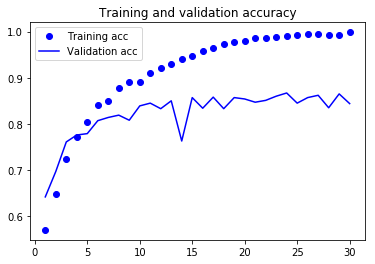

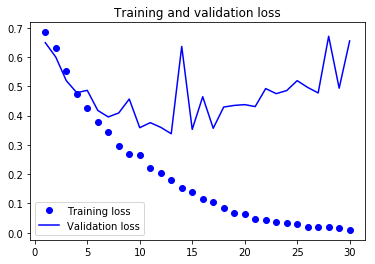

In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [0]:
datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

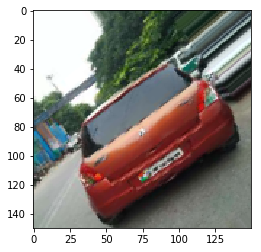

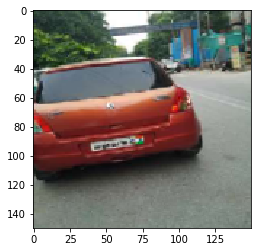

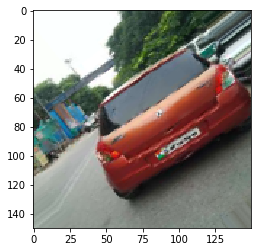

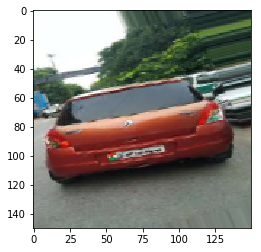

In [0]:

from keras.preprocessing import image

fnames = [os.path.join(train_swift_dir, fname) for fname in os.listdir(train_swift_dir)]
img_path = fnames[1]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

NameError: ignored

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=32,
                                                        class_mode='binary')

Found 2400 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [0]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/100
100/100 [==============================] - 32s 319ms/step - loss: 0.6935 - acc: 0.5056 - val_loss: 0.6891 - val_acc: 0.5463
Epoch 2/100
100/100 [==============================] - 28s 282ms/step - loss: 0.6861 - acc: 0.5387 - val_loss: 0.6881 - val_acc: 0.5225
Epoch 3/100
100/100 [==============================] - 28s 283ms/step - loss: 0.6808 - acc: 0.5569 - val_loss: 0.6757 - val_acc: 0.5513
Epoch 4/100
100/100 [==============================] - 28s 283ms/step - loss: 0.6720 - acc: 0.5794 - val_loss: 0.7023 - val_acc: 0.5262
Epoch 5/100
100/100 [==============================] - 28s 282ms/step - loss: 0.6624 - acc: 0.5875 - val_loss: 0.6486 - val_acc: 0.6587
Epoch 6/100
100/100 [==============================] - 28s 282ms/step - loss: 0.6612 - acc: 0.6063 - val_loss: 0.6696 - val_acc: 0.5587
Epoch 7/100
100/100 [==============================] - 28s 283ms/step - loss: 0.6493 - acc: 0.6178 - val_loss: 0.6220 - val_acc: 0.7125
Epoch 8/100
100/100 [===========================

In [0]:
import pandas as pd
hist_df = pd.DataFrame(history.history)
hist_csv_file = 'history_final.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)


NameError: ignored

In [0]:
model.save('swift_and_wagonR_final.h5')


NameError: ignored

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

NameError: ignored